```

| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  열차 하나 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
                            .
                            .
                            .
                            .
                            .
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  열차 백 

```

전체 구간에 대해 유전 알고리즘을 적용시킴니다.

In [314]:
# import 및 변수정의 구간
import random
import math
import re
import operator 
from random import randint

# 리스트 크기
listN = 8

# 염색체 해집단 수
N = 50

# 역 구간
Station_section = 11

# 하루에 운행하는 열차 수
One_day_train = 96

#열차의 출발시간 
Arrival_time_zone = ["05:23:00", "05:33:00", "05:41:00", "05:48:00", "05:56:00", "06:08:00", "06:16:00", "06:24:00", "06:31:00", "06:42:00", "06:46:00", "07:00:00", "07:06:30", "07:12:00", "07:24:00", "07:29:00", "07:42:00", "07:55:00", "08:09:00", "08:21:00", "08:35:00", "08:45:00", "08:55:00", "09:12:00", "09:27:00", "09:41:00", "09:47:00", "09:55:00", "10:08:00", "10:16:30", "10:23:00", "10:35:00", "10:43:00", "10:56:00", "11:12:00", "11:22:30", "11:36:00", "11:50:00", "12:00:00", "12:12:00", "12:22:00", "12:37:00", "12:53:00", "13:06:00", "13:12:00", "13:22:00", "13:32:00", "13:42:00", "13:52:00", "14:03:00", "14:12:00", "14:26:00", "14:41:00", "14:52:00", "15:05:00", "15:13:00", "15:26:00", "15:37:30", "15:52:00", "16:02:00", "16:13:00", "16:18:00", "16:33:00", "16:45:00", "16:59:00", "17:08:00", "17:17:00", "17:25:00", "17:34:00", "17:45:00", "17:52:00", "18:05:30", "18:18:00", "18:25:00", "18:38:00", "18:53:00", "19:05:00", "19:12:00", "19:25:00", "19:36:00", "19:46:00", "19:57:00", "20:12:00", "20:23:00", "20:31:00", "20:45:30", "21:00:00", "21:12:00", "21:25:00", "21:37:00", "21:53:00", "22:10:00", "22:25:00", "22:45:00", "23:00:00", "23:20:00"]

#교차율
Pc = 0.7

#변이율 역수 관계
Pm = 100

#마지막 세대수 
largest_generation = 5

#보존할 상위값
save_value = 5

choice_list = [i+1 for i in range(listN-1)]


In [315]:
#초기값
speedlist = [[[[random.choice([0,1]) for i in range(listN)]for j in range(Station_section)]for k in range(One_day_train)]for z in range(N)]


In [316]:
# 01010로 이루어진 리스트를 10진수로 디코딩하는 함수

def decoding(X, Y=0):
    """
    input   : 0100로 이루어진 리스트
    return : 10진수 정수
    """
    for i, x in enumerate(X[1:]):
        Y += x* math.pow(2, listN -i -2)
    #10나누고 소스점 1자리 표시하는데 왜 
    #Y = round(Y/10, 1) 
    
    #처음 값이 0이면 음수로 return
    if X[0] == 0: return -Y
    return Y

In [317]:
decoding([0,1,1,0,0,1,1,1])

-103.0

In [318]:
#파일을 2차원 배열로 바꿔주기

def Readtxt(fname):
    """
    input  : 파일들
    return : 2차원 배열 
    """
    w = []
    with open(fname, 'r') as f :
        for line in f: #for each line in the file,
            w.append(line.split('\t'))
    return w

In [319]:
def fine_score(X):
    sp = []
    for i, _ in enumerate(X[1:]):
        sp.append((777 - (6 * X[i+1])) * 8)
    return sp

In [320]:
# 바뀌야됨
#
def ScoreFunction(X):
    """
    X에 속도 리스트를 넣어서 평가
    """
    #구간별 점수 (11개죠)
    sp = [Arrival_time_zone[X[0]]]
    for x in (X[1:]):
        sp.append(decoding(x))
    
    sp = fine_score(sp)
    
    return sp


In [321]:

for i in range(10):
    test_X = ScoreFunction([i] + speedlist[1][i]  )
    print(test_X)

[6840.0, 4968.0, 9240.0, 2136.0, 7800.0, 5928.0, 9048.0, 8136.0, 840.0, 5304.0, 2808.0]
[5880.0, 11448.0, 9192.0, 3048.0, 5688.0, 10872.0, 8232.0, 1032.0, 6696.0, 4776.0, 6168.0]
[3384.0, 5208.0, 9336.0, 4728.0, 216.0, 1896.0, 4344.0, 7128.0, 12216.0, 8616.0, 7608.0]
[5064.0, 1080.0, 9480.0, 2760.0, 8424.0, 7464.0, 8472.0, 9960.0, 1032.0, 1128.0, 4296.0]
[5544.0, 2904.0, 936.0, 12216.0, 8616.0, 3528.0, 10776.0, 6936.0, 10920.0, 1752.0, 648.0]
[10872.0, 11784.0, 8568.0, 1656.0, 4296.0, 6264.0, 9432.0, 5112.0, 1752.0, 9912.0, 7224.0]
[3576.0, 11160.0, 8280.0, 792.0, 3912.0, 7800.0, 8664.0, 6936.0, 11544.0, 2856.0, 7704.0]
[8616.0, 5976.0, 8952.0, 7944.0, 648.0, 11592.0, 10056.0, 1512.0, 5160.0, 3912.0, 8184.0]
[6456.0, 2808.0, 5064.0, 6072.0, 12024.0, 1896.0, 9384.0, 11928.0, 1128.0, 1032.0, 1080.0]
[1800.0, 1224.0, 312.0, 4584.0, 6216.0, 8856.0, 10584.0, 12312.0, 6888.0, 6600.0, 2184.0]


In [322]:
print(len(speedlist), len(speedlist[0]), len(speedlist[0][0]),len(speedlist[0][0][0]))

50 96 11 8


In [323]:
#하루 열차의 총합 구하기
def Make_Score_per_all(speedlist):
    #열차마다 점수                             #30개의 경쟁 100개의 열차
    Score_per_train = [[0 for i in range(One_day_train)]for j in range(N)]

    # 30개의 경쟁
    for k in range(N):
        # 100대의 열차
        for i in range(One_day_train):
            one_tranin = ScoreFunction([i]+speedlist[k][i])
            # 11개의 역
            for j in range(Station_section):
                #각 열차에 대해      += 11개의 구간 
                Score_per_train[k][i] += one_tranin[j]


    # 하루마다의 점수 
    Score_per_all = [0 for i in range(N)]

    # 30개의 경쟁            
    for i in range(N):
        # 100대의 열차
        for j in range(One_day_train):
             Score_per_all[i] += Score_per_train[i][j]
                
    return Score_per_all

In [324]:
#Score_per_all = Make_Score_per_all(speedlist)
#Score_per_all

In [325]:
print(len(speedlist), len(speedlist[0]), len(speedlist[0][0]), len(speedlist[0][0][0]),"총개수 : " ,len(speedlist) * len(speedlist[0]) * len(speedlist[0][0]) * len(speedlist[0][0][0])
)


50 96 11 8 총개수 :  422400


In [326]:
def Score_assessment_group(Score_per_all):
    # 적합도 비율 찾기
    speedlist_evaluation = [[Score_per_all[i], 0, i] for i in range(N)]

    Sum_of_fitness = 0
    for i in range(N): 
        Sum_of_fitness += Score_per_all[i]
    for i in range(N):
        if i == 0:
            speedlist_evaluation[i][1] = speedlist_evaluation[i][0]/Sum_of_fitness
        else:
            speedlist_evaluation[i][1] = speedlist_evaluation[i-1][1]  + speedlist_evaluation[i][0]/Sum_of_fitness
    
    return speedlist_evaluation


In [327]:
def roulettes(Group_assessment_value):
    roulette = random.random()
    for i in range(N):
        if i == 0:
            if 0 < roulette < Group_assessment_value[i][1]:
                break
        if Group_assessment_value[i-1][1] < roulette < Group_assessment_value[i][1]:
            break
    return i

In [328]:
#부모 변경
def Change_parent(speedlist, Selected_list_in_roulette):
    W = [[[0 for j in range(Station_section)]for k in range(One_day_train)]for z in range(N)]
    # 교차함수 및 변이함수 (자식만들기)
    for i in range(int(N/2)):
        for j in range(One_day_train):
            for k in range(Station_section):
                #교차
                selection = random.random()
                ###############################################################
                rand = random.choice(choice_list) # 0~ 이구간, 이구간 ~ 끝 교차 , 이구간 = 1~리스트 크기 -1 
                if selection < Pc:
                    # W(교차된 자식) = Selected_list_in_roulette(선택된 리스트에서) rand구간으로 나눈 값
                    W[i*2][j][k]     = speedlist[Selected_list_in_roulette[i*2]][j][k][0:rand]         + speedlist[Selected_list_in_roulette[i*2+1]][j][k][rand:]
                    W[i*2+1][j][k] = speedlist[Selected_list_in_roulette[i*2+1]][j][k][0:rand] + speedlist[Selected_list_in_roulette[i*2]][j][k][rand:]
                else:
                    W[i*2][j][k]     = speedlist[Selected_list_in_roulette[i*2]][j][k]
                    W[i*2+1][j][k] = speedlist[Selected_list_in_roulette[i*2+1]][j][k]
                #변의
                for z in range(2):
                    # Pm * 100 분의 1의 확률 
                    if randint(0, 100 * Pm) == 0:
                        #selection 부분을 변의 1 -> 0  0 -> 1
                        if W[i*2+z][j][k][rand] == 0:
                            W[i*2+z][j][k][rand] = 1
                        else:
                            W[i*2+z][j][k][rand] = 0
    return W

In [329]:
#세대 반복
def Evolution(speedlist, num_generation):
    All_New_Score_per_all = []
    while 1: 
        if num_generation >= largest_generation:
            break

        #전체 값으로 해서 
        Score_per_all = Make_Score_per_all(speedlist)

        #평가한 값 
        Group_assessment_value = Score_assessment_group(Score_per_all)

        #                                         정렬   점수값이 높은 순으로
        sortand_Group_assessmend = sorted(Group_assessment_value, key=operator.itemgetter(0),reverse=True)
        #상위 save_value 개값        
        save_assessmend_value = sortand_Group_assessmend[0:save_value]
        # Score_per_all에서 몇번 배열이 상위 5개인지만 
        # 리스트 해쉬값만
        save_assessmend_num = [save_assessmend_value[i][2] for i in range(save_value)]


        Selected_list_in_roulette = []

        #룰렛에 선택된 리스트들 마지막 5개는 상위5개만 
        for i in range(N-5):
            Selected_list_in_roulette.append(roulettes(Group_assessment_value))

        Selected_list_in_roulette += save_assessmend_num
        
        #룰렛 랜덤하게  근데이거하면 오류남 왜지?
        #Selected_list_in_roulette = random.shuffle(Selected_list_in_roulette)
        # ------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        New_list = Change_parent(speedlist, Selected_list_in_roulette)
        
        New_Score_per_all = Make_Score_per_all(New_list)
        
        print("-" * 15)    
        print(num_generation,"번째를 합니다.")
        print("-" * 15)
        for i, nl in enumerate(New_Score_per_all):
            print(i, nl)
        All_New_Score_per_all.append(New_Score_per_all)
        speedlist = New_list
        num_generation += 1

    return New_list, All_New_Score_per_all

In [330]:
test_list = []
plt_score_per =[]
test_list,plt_score  = Evolution(speedlist, 0)

---------------
0 번째를 합니다.
---------------
0 6456288.0
1 6577104.0
2 6664368.0
3 6615552.0
4 6494496.0
5 6683616.0
6 6612432.0
7 6391488.0
8 6831936.0
9 6574800.0
10 6418944.0
11 6498432.0
12 6491328.0
13 6582384.0
14 6487248.0
15 6491136.0
16 6630288.0
17 6427920.0
18 6712320.0
19 6602064.0
20 6678816.0
21 6509280.0
22 6627984.0
23 6451008.0
24 6612864.0
25 6478944.0
26 6379584.0
27 6536976.0
28 6459264.0
29 6562512.0
30 6362880.0
31 6517344.0
32 6688080.0
33 6370800.0
34 6521232.0
35 6797952.0
36 6493056.0
37 6762192.0
38 6784320.0
39 6824496.0
40 6513888.0
41 6804432.0
42 6392352.0
43 6628848.0
44 6512880.0
45 6841392.0
46 6800016.0
47 6780240.0
48 6804432.0
49 6743856.0
---------------
1 번째를 합니다.
---------------
0 6655728.0
1 6684000.0
2 6533472.0
3 6470880.0
4 6616848.0
5 6470160.0
6 6396144.0
7 6470256.0
8 6486720.0
9 6688320.0
10 6531840.0
11 6485232.0
12 6586368.0
13 6425376.0
14 6602208.0
15 6394416.0
16 6366912.0
17 6843456.0
18 6550560.0
19 6623568.0
20 6723216.0
21 6757488.

In [331]:
test_list

[[[[1, 0, 0, 0, 0, 1, 1, 1],
   [0, 1, 0, 0, 1, 0, 1, 1],
   [0, 1, 1, 0, 1, 0, 1, 1],
   [0, 1, 0, 1, 0, 1, 0, 0],
   [1, 0, 1, 1, 1, 1, 0, 0],
   [1, 1, 1, 1, 1, 0, 0, 0],
   [1, 0, 1, 0, 0, 0, 0, 1],
   [1, 0, 1, 0, 0, 0, 1, 0],
   [1, 1, 0, 1, 0, 0, 0, 1],
   [1, 0, 0, 1, 1, 1, 1, 0],
   [1, 0, 1, 1, 0, 0, 0, 1]],
  [[1, 1, 1, 0, 1, 0, 0, 1],
   [1, 0, 0, 1, 0, 1, 0, 1],
   [0, 0, 0, 0, 1, 0, 1, 0],
   [1, 0, 1, 1, 0, 1, 1, 1],
   [1, 1, 0, 0, 0, 0, 0, 1],
   [1, 0, 1, 1, 0, 0, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 0],
   [0, 1, 0, 1, 1, 1, 0, 1],
   [0, 0, 1, 0, 0, 1, 1, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 1, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 1, 1, 0],
   [0, 0, 1, 0, 0, 0, 0, 0],
   [0, 0, 1, 1, 0, 1, 0, 1],
   [1, 1, 0, 1, 0, 1, 0, 1],
   [1, 0, 0, 0, 1, 0, 0, 1],
   [0, 1, 1, 1, 1, 0, 0, 0],
   [1, 1, 1, 1, 0, 0, 0, 1],
   [0, 1, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 1, 1, 1, 0, 1],
   [1, 0, 1, 0, 1, 1, 1, 0],
   [1, 1, 0, 1, 0, 0, 0, 1]],
  [[0, 0, 1, 1, 0, 0, 0, 0],
   [0, 1, 0

In [332]:
plt_score

[[6456288.0,
  6577104.0,
  6664368.0,
  6615552.0,
  6494496.0,
  6683616.0,
  6612432.0,
  6391488.0,
  6831936.0,
  6574800.0,
  6418944.0,
  6498432.0,
  6491328.0,
  6582384.0,
  6487248.0,
  6491136.0,
  6630288.0,
  6427920.0,
  6712320.0,
  6602064.0,
  6678816.0,
  6509280.0,
  6627984.0,
  6451008.0,
  6612864.0,
  6478944.0,
  6379584.0,
  6536976.0,
  6459264.0,
  6562512.0,
  6362880.0,
  6517344.0,
  6688080.0,
  6370800.0,
  6521232.0,
  6797952.0,
  6493056.0,
  6762192.0,
  6784320.0,
  6824496.0,
  6513888.0,
  6804432.0,
  6392352.0,
  6628848.0,
  6512880.0,
  6841392.0,
  6800016.0,
  6780240.0,
  6804432.0,
  6743856.0],
 [6655728.0,
  6684000.0,
  6533472.0,
  6470880.0,
  6616848.0,
  6470160.0,
  6396144.0,
  6470256.0,
  6486720.0,
  6688320.0,
  6531840.0,
  6485232.0,
  6586368.0,
  6425376.0,
  6602208.0,
  6394416.0,
  6366912.0,
  6843456.0,
  6550560.0,
  6623568.0,
  6723216.0,
  6757488.0,
  6633984.0,
  6868272.0,
  6513696.0,
  6517488.0,
  6556032.0

[6841392.0, 6878112.0, 6882192.0, 6918960.0, 6938928.0]
[6589721.28, 6622364.16, 6652243.2, 6652034.88, 6684200.64]


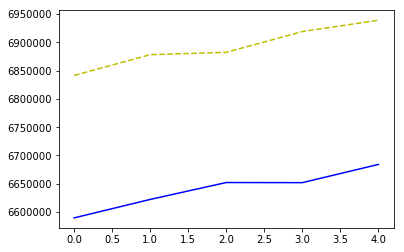

In [333]:
import matplotlib.pyplot as plt




plt_score_max =  [max(plt_score[i]) for i in range(len(plt_score))]
plt_score_avg  =  [sum(plt_score[i])/len(plt_score[i]) for i in range(len(plt_score))]
print(plt_score_max)
print(plt_score_avg)

plt.plot(plt_score_max, 'y--')
plt.plot(plt_score_avg,'b')

plt.show()


In [334]:
Www = [[[0 for i in range(2)]for j in range(2)]for k in range(2)]
    # 교차함수 및 변이함수 (자식만들기)
    
print(Www)
for i in range(2):
    for j in range(2):
        for k in range(2):
            Www[i][j][k] = [43,43,0,2,2]
            
Www

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]


[[[[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]],
  [[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]]],
 [[[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]],
  [[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]]]]

In [335]:
len(a)
a

['05:25:00',
 '05:20:00',
 '05:40:00',
 '05:50:00',
 '06:00:00',
 '06:07:00',
 '06:15:00',
 '06:21:00',
 '06:30:00',
 '06:35:00',
 '06:40:00',
 '06:47:30',
 '06:56:00',
 '07:00:00',
 '07:04:30',
 '07:11:00',
 '07:14:30',
 '07:21:30',
 '07:30:00',
 '07:35:00',
 '07:37:00',
 '07:42:00',
 '07:47:00',
 '07:57:00',
 '07:58:00',
 '08:01:00',
 '08:07:00',
 '08:13:30',
 '08:20:00',
 '08:25:00',
 '08:28:00',
 '08:34:00',
 '08:41:00',
 '08:45:00',
 '08:50:00',
 '08:56:00',
 '09:00:00',
 '09:03:00',
 '09:10:30',
 '09:15:00',
 '09:21:00',
 '09:29:30',
 '09:36:00',
 '09:40:00',
 '09:45:00',
 '09:49:30',
 '10:01:00',
 '10:01:00',
 '10:02:00',
 '10:10:00',
 '10:16:00',
 '10:20:00',
 '10:29:00',
 '10:36:00',
 '10:40:00',
 '10:45:30',
 '10:50:00',
 '10:56:00',
 '10:58:00',
 '11:06:00',
 '11:11:00',
 '11:17:00',
 '11:25:30',
 '11:30:00',
 '11:33:00',
 '11:39:00',
 '11:47:00',
 '11:55:00',
 '12:00:00',
 '12:02:00',
 '12:07:00',
 '12:11:00',
 '12:19:30',
 '12:30:00',
 '12:32:00',
 '12:36:00',
 '12:41:00',

In [336]:
['12:34:20']+[23,45,93]

['12:34:20', 23, 45, 93]

In [337]:
speedlist[1][10][1]

[1, 0, 0, 1, 1, 1, 0, 1]

In [338]:
test_speedlist = [[[[0,1,1,1,1,1,1,1]for j in range(Station_section)]for k in range(One_day_train)]for z in range(N)]

test_scoressss  = Make_Score_per_all(test_speedlist)

test_scoressss

[13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0,
 13001472.0]

In [339]:
test_sp_list = [i-10 + i * i for i in range(10)]
test_sp_list

[-10, -8, -4, 2, 10, 20, 32, 46, 62, 80]